In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [13]:
# Загрузка данных
print("\n[1/3] Загрузка данных...")
data = pd.read_csv('data_banknote_authentication.txt', header=None)
data.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

print(f"✓ Данные загружены")
print(f"  - Размер датасета: {data.shape[0]} строк, {data.shape[1]} столбцов")
print(f"  - Распределение классов:")
print(f"    Класс 0 (подлинные): {(data['Class'] == 0).sum()} ({(data['Class'] == 0).sum() / len(data) * 100:.1f}%)")
print(f"    Класс 1 (поддельные): {(data['Class'] == 1).sum()} ({(data['Class'] == 1).sum() / len(data) * 100:.1f}%)")

# Разделение на признаки и целевую переменную
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Разбиение на обучающую и тестовую выборки
print("\n[2/3] Разбиение данных...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Данные разделены")
print(f"  - Обучающая выборка: {X_train.shape[0]} примеров")
print(f"  - Тестовая выборка: {X_test.shape[0]} примеров")

# Стандартизация признаков
print("\n[3/3] Стандартизация признаков...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Признаки стандартизированы")


[1/3] Загрузка данных...
✓ Данные загружены
  - Размер датасета: 1372 строк, 5 столбцов
  - Распределение классов:
    Класс 0 (подлинные): 762 (55.5%)
    Класс 1 (поддельные): 610 (44.5%)

[2/3] Разбиение данных...
✓ Данные разделены
  - Обучающая выборка: 1097 примеров
  - Тестовая выборка: 275 примеров

[3/3] Стандартизация признаков...
✓ Признаки стандартизированы


## Задание 1

ЗАДАНИЕ 1: СРАВНЕНИЕ РАЗЛИЧНЫХ ЯДЕР SVM

Обучение и тестирование моделей с различными ядрами...
----------------------------------------------------------------------

Ядро: LINEAR
  ✓ Обучение: 0.0074 сек
  ✓ Предсказание: 0.0005 сек
  ✓ Точность: 0.9745 (97.45%)

Ядро: POLY
  ✓ Обучение: 0.0069 сек
  ✓ Предсказание: 0.0013 сек
  ✓ Точность: 0.9818 (98.18%)

Ядро: RBF
  ✓ Обучение: 0.0055 сек
  ✓ Предсказание: 0.0025 сек
  ✓ Точность: 1.0000 (100.00%)

Ядро: SIGMOID
  ✓ Обучение: 0.0154 сек
  ✓ Предсказание: 0.0056 сек
  ✓ Точность: 0.7855 (78.55%)

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
 Kernel  Accuracy  Train Time (sec)  Predict Time (sec)
    rbf  1.000000          0.005478            0.002478
   poly  0.981818          0.006944            0.001263
 linear  0.974545          0.007419            0.000483
sigmoid  0.785455          0.015444            0.005614

Лучшее ядро: RBF
Максимальная точность: 1.0000 (100.00%)


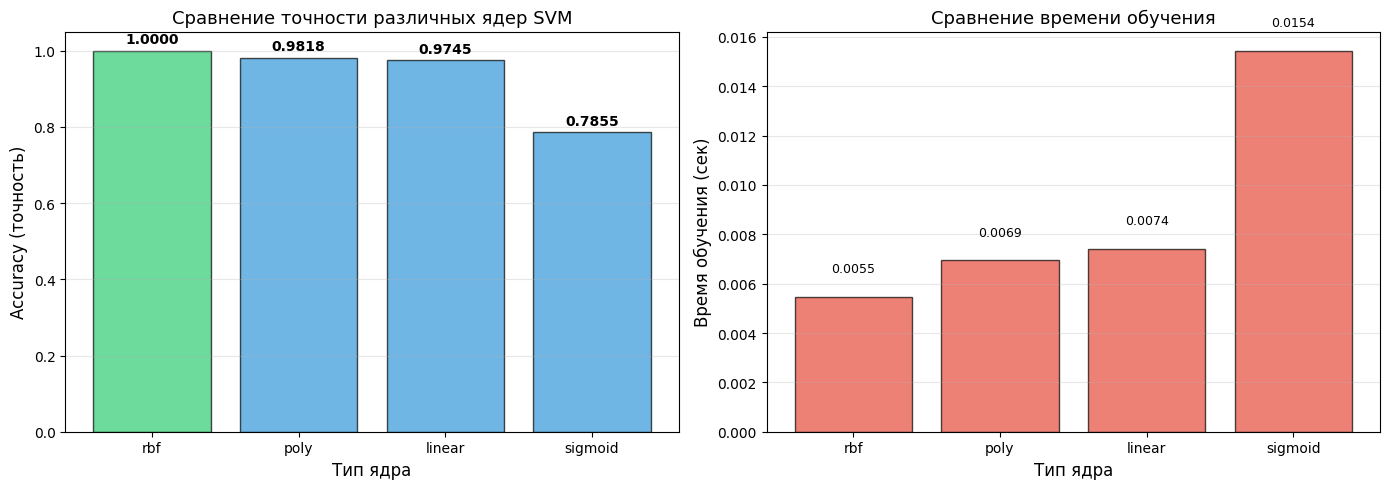

✓ Результаты сохранены в 'kernel_comparison_results.csv'

ЗАДАНИЕ 1 ВЫПОЛНЕНО УСПЕШНО!


In [16]:
print("="*70)
print("ЗАДАНИЕ 1: СРАВНЕНИЕ РАЗЛИЧНЫХ ЯДЕР SVM")
print("="*70)

print("\nОбучение и тестирование моделей с различными ядрами...")
print("-" * 70)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    print(f"\nЯдро: {kernel.upper()}")
    
    # Создание и обучение модели
    start_time = time.time()
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Предсказание
    start_time = time.time()
    y_pred = clf.predict(X_test_scaled)
    predict_time = time.time() - start_time
    
    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)
    
    # Сохранение результатов
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Train Time (sec)': train_time,
        'Predict Time (sec)': predict_time
    })
    
    print(f"  ✓ Обучение: {train_time:.4f} сек")
    print(f"  ✓ Предсказание: {predict_time:.4f} сек")
    print(f"  ✓ Точность: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Создание DataFrame с результатами
print("\n" + "="*70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*70)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print(results_df.to_string(index=False))

# Определение лучшего ядра
best_kernel = results_df.iloc[0]['Kernel']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n{'='*70}")
print(f"Лучшее ядро: {best_kernel.upper()}")
print(f"Максимальная точность: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"{'='*70}")

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Сравнение точности
colors = ['#3498db' if k != best_kernel else '#2ecc71' for k in results_df['Kernel']]
axes[0].bar(results_df['Kernel'], results_df['Accuracy'], color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Тип ядра', fontsize=12)
axes[0].set_ylabel('Accuracy (точность)', fontsize=12)
axes[0].set_title('Сравнение точности различных ядер SVM', fontsize=13)
axes[0].set_ylim([0, 1.05])
axes[0].grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for i, (kernel, acc) in enumerate(zip(results_df['Kernel'], results_df['Accuracy'])):
    axes[0].text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=10, fontweight='bold')

# График 2: Сравнение времени обучения
axes[1].bar(results_df['Kernel'], results_df['Train Time (sec)'], 
            color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Тип ядра', fontsize=12)
axes[1].set_ylabel('Время обучения (сек)', fontsize=12)
axes[1].set_title('Сравнение времени обучения', fontsize=13)
axes[1].grid(True, alpha=0.3, axis='y')

# Добавление значений
for i, (kernel, time_val) in enumerate(zip(results_df['Kernel'], results_df['Train Time (sec)'])):
    axes[1].text(i, time_val + 0.001, f'{time_val:.4f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('kernel_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Сохранение результатов
results_df.to_csv('kernel_comparison_results.csv', index=False)
print("✓ Результаты сохранены в 'kernel_comparison_results.csv'")

print("\n" + "="*70)
print("ЗАДАНИЕ 1 ВЫПОЛНЕНО УСПЕШНО!")
print("="*70)

## Задание 2


[1/2] Настройка параметров с помощью GridSearchCV...
Параметры поиска:
  - Ядро: RBF (выбрано в задании 1)
  - C: [0.1, 1, 10, 100, 1000]
  - gamma: [0.001, 0.01, 0.1, 1, 10]
  - Кросс-валидация: 5 фолдов

Запуск Grid Search...
Fitting 5 folds for each of 25 candidates, totalling 125 fits

✓ Поиск завершен за 0.57 сек

РЕЗУЛЬТАТЫ GRID SEARCH
Лучшие параметры:
  - C: 10
  - gamma: 0.1
Лучшая точность (CV): 1.0000 (100.00%)

[2/2] Оценка на тестовой выборке...
✓ Точность на тестовой выборке: 1.0000 (100.00%)

----------------------------------------------------------------------
ОТЧЕТ ПО КЛАССИФИКАЦИИ
----------------------------------------------------------------------
              precision    recall  f1-score   support

     Genuine     1.0000    1.0000    1.0000       153
      Forged     1.0000    1.0000    1.0000       122

    accuracy                         1.0000       275
   macro avg     1.0000    1.0000    1.0000       275
weighted avg     1.0000    1.0000    1.0000      

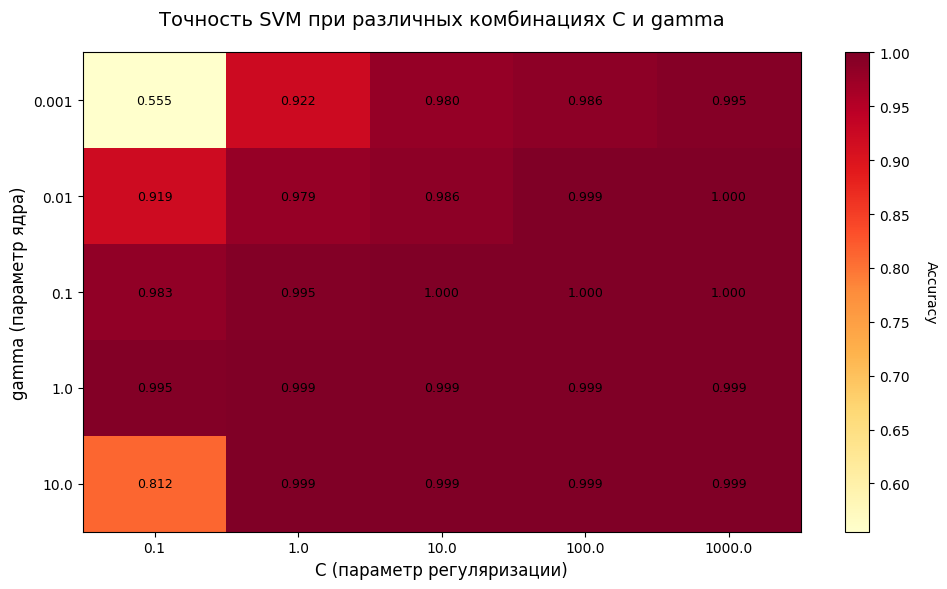


ЗАДАНИЕ 2 ВЫПОЛНЕНО УСПЕШНО!


In [17]:
# Определение сетки параметров для RBF-ядра
print("\n[1/2] Настройка параметров с помощью GridSearchCV...")
print("Параметры поиска:")
print("  - Ядро: RBF (выбрано в задании 1)")
print("  - C: [0.1, 1, 10, 100, 1000]")
print("  - gamma: [0.001, 0.01, 0.1, 1, 10]")
print("  - Кросс-валидация: 5 фолдов")

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Создание модели
svc = SVC(kernel='rbf', random_state=42)

# GridSearchCV с кросс-валидацией
start_time = time.time()
grid_search = GridSearchCV(
    svc, 
    param_grid, 
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("\nЗапуск Grid Search...")
grid_search.fit(X_train_scaled, y_train)
search_time = time.time() - start_time

print(f"\n✓ Поиск завершен за {search_time:.2f} сек")

# Лучшие параметры
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\n" + "="*70)
print("РЕЗУЛЬТАТЫ GRID SEARCH")
print("="*70)
print(f"Лучшие параметры:")
print(f"  - C: {best_params['C']}")
print(f"  - gamma: {best_params['gamma']}")
print(f"Лучшая точность (CV): {best_score:.4f} ({best_score*100:.2f}%)")

# Оценка на тестовой выборке
print("\n[2/2] Оценка на тестовой выборке...")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"✓ Точность на тестовой выборке: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Детальный отчет
print("\n" + "-"*70)
print("ОТЧЕТ ПО КЛАССИФИКАЦИИ")
print("-"*70)
print(classification_report(y_test, y_pred, 
                          target_names=['Genuine', 'Forged'],
                          digits=4))

# Анализ результатов Grid Search
print("\n" + "="*70)
print("АНАЛИЗ РЕЗУЛЬТАТОВ GRID SEARCH")
print("="*70)

# Получение всех результатов
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
cv_results.columns = ['C', 'gamma', 'Mean Accuracy', 'Std Accuracy']
cv_results = cv_results.sort_values('Mean Accuracy', ascending=False)

print("\nТоп-10 комбинаций параметров:")
print(cv_results.head(10).to_string(index=False))

# Визуализация результатов
print("\nПостроение тепловой карты результатов...")

# Создание сводной таблицы для тепловой карты
pivot_table = cv_results.pivot_table(
    values='Mean Accuracy', 
    index='gamma', 
    columns='C'
)

# Построение тепловой карты
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(pivot_table.values, cmap='YlOrRd', aspect='auto')

# Настройка осей
ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)

# Подписи осей
ax.set_xlabel('C (параметр регуляризации)', fontsize=12)
ax.set_ylabel('gamma (параметр ядра)', fontsize=12)
ax.set_title('Точность SVM при различных комбинациях C и gamma', fontsize=14, pad=20)

# Добавление значений в ячейки
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f'{pivot_table.values[i, j]:.3f}',
                      ha="center", va="center", color="black", fontsize=9)

# Цветовая шкала
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Accuracy', rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('grid_search_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("ЗАДАНИЕ 2 ВЫПОЛНЕНО УСПЕШНО!")
print("="*70)

## Задание 3


[1/2] Обучение базовой модели (C=1.0, gamma='scale')...
✓ Базовая модель обучена
  Точность: 1.0000 (100.00%)

[2/2] Детальное исследование влияния параметров C и gamma...
Тестируемые параметры:
  - C: [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
  - gamma: [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
  - Общее количество комбинаций: 100
  [  1/100] C=   0.01, gamma= 0.0001 | Accuracy: 0.5564 | Прогресс:   1.0% | Осталось: ~5 сек
  [ 10/100] C=   0.01, gamma=10.0000 | Accuracy: 0.5564 | Прогресс:  10.0% | Осталось: ~5 сек
  [ 20/100] C=   0.10, gamma=10.0000 | Accuracy: 0.9236 | Прогресс:  20.0% | Осталось: ~4 сек
  [ 30/100] C=   0.50, gamma=10.0000 | Accuracy: 1.0000 | Прогресс:  30.0% | Осталось: ~3 сек
  [ 40/100] C=   1.00, gamma=10.0000 | Accuracy: 1.0000 | Прогресс:  40.0% | Осталось: ~2 сек
  [ 50/100] C=   5.00, gamma=10.0000 | Accuracy: 1.0000 | Прогресс:  50.0% | Осталось: ~2 сек
  [ 60/100] C=  10.00, gamma=10.0000 | Accuracy: 1.0000 | Прогресс:  60.0% | Остало

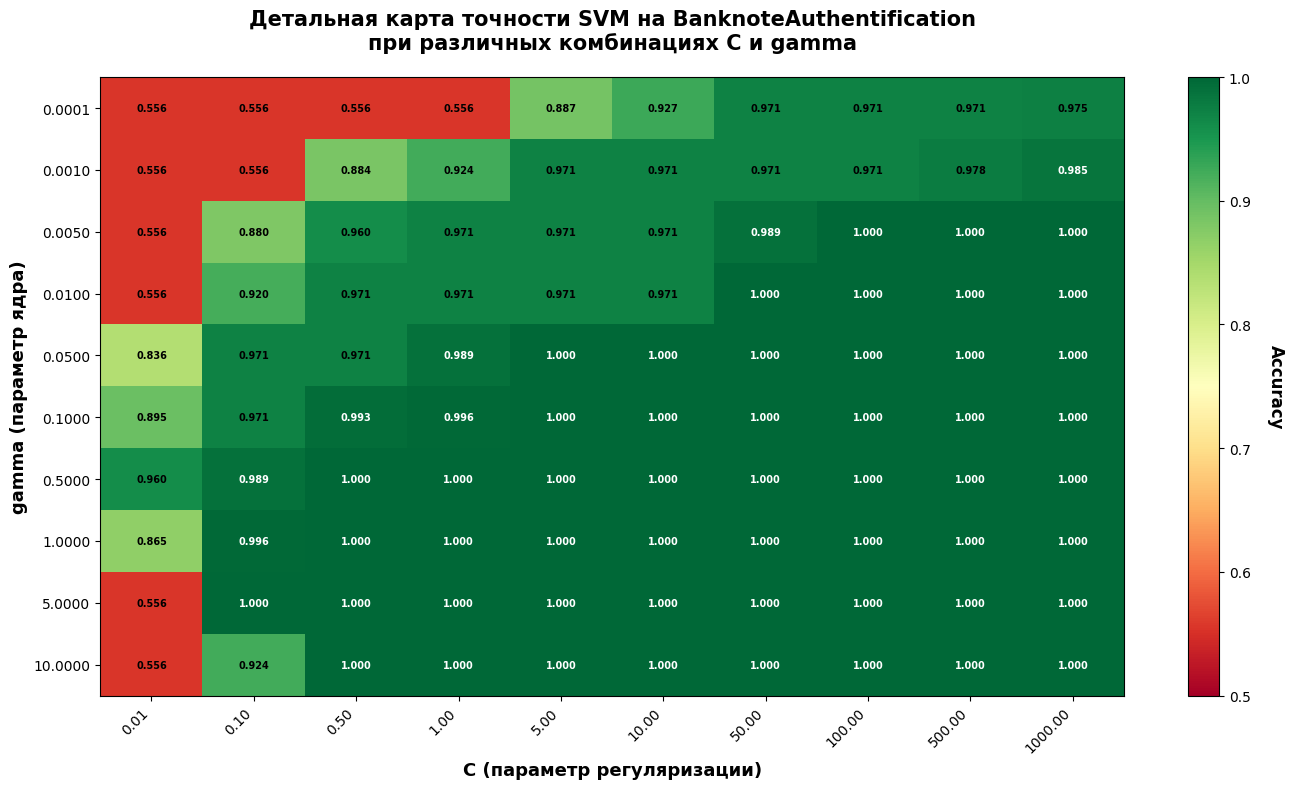

График 1
0.5
          C  gamma  Accuracy      Time
6      0.01    0.5  0.960000  0.047040
16     0.10    0.5  0.989091  0.017250
26     0.50    0.5  1.000000  0.008712
36     1.00    0.5  1.000000  0.006956
46     5.00    0.5  1.000000  0.005024
56    10.00    0.5  1.000000  0.005047
66    50.00    0.5  1.000000  0.006376
76   100.00    0.5  1.000000  0.005625
86   500.00    0.5  1.000000  0.005489
96  1000.00    0.5  1.000000  0.005701
График 2
0.5
      C    gamma  Accuracy      Time
20  0.5   0.0001  0.556364  0.046908
21  0.5   0.0010  0.883636  0.042980
22  0.5   0.0050  0.960000  0.029927
23  0.5   0.0100  0.970909  0.024826
24  0.5   0.0500  0.970909  0.012967
25  0.5   0.1000  0.992727  0.010193
26  0.5   0.5000  1.000000  0.008712
27  0.5   1.0000  1.000000  0.009706
28  0.5   5.0000  1.000000  0.025606
29  0.5  10.0000  1.000000  0.040357


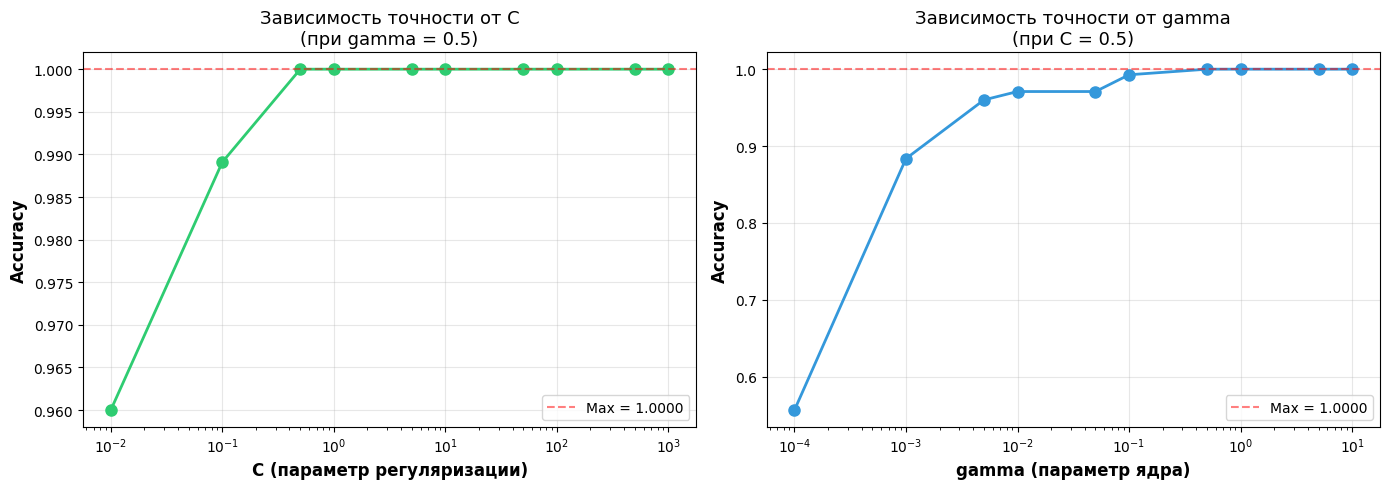


ЗАДАНИЕ 3 ВЫПОЛНЕНО УСПЕШНО!


In [18]:
# Базовая модель для сравнения (с параметрами по умолчанию)
print("\n[1/2] Обучение базовой модели (C=1.0, gamma='scale')...")
svc_baseline = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_baseline.fit(X_train_scaled, y_train)
y_pred_baseline = svc_baseline.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"✓ Базовая модель обучена")
print(f"  Точность: {accuracy_baseline:.4f} ({accuracy_baseline*100:.2f}%)")

# Расширенная сетка параметров для детального исследования
print("\n[2/2] Детальное исследование влияния параметров C и gamma...")
print("Тестируемые параметры:")

# Расширенная сетка с более мелким шагом
C_range = [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
gamma_range = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

print(f"  - C: {C_range}")
print(f"  - gamma: {gamma_range}")
print(f"  - Общее количество комбинаций: {len(C_range) * len(gamma_range)}")

results = []
total_combinations = len(C_range) * len(gamma_range)
current = 0

start_time = time.time()

for C in C_range:
    for gamma in gamma_range:
        current += 1
        iter_start = time.time()
        
        # Обучение модели
        svc = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        svc.fit(X_train_scaled, y_train)
        
        # Предсказание
        y_pred = svc.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        iter_time = time.time() - iter_start
        
        results.append({
            'C': C,
            'gamma': gamma,
            'Accuracy': accuracy,
            'Time': iter_time
        })
        
        # Прогресс каждые 10 итераций
        if current % 10 == 0 or current == 1 or current == total_combinations:
            elapsed = time.time() - start_time
            avg_time = elapsed / current
            remaining = avg_time * (total_combinations - current)
            progress = (current / total_combinations) * 100
            
            print(f"  [{current:3d}/{total_combinations}] C={C:7.2f}, gamma={gamma:7.4f} | "
                  f"Accuracy: {accuracy:.4f} | Прогресс: {progress:5.1f}% | "
                  f"Осталось: ~{remaining:.0f} сек")

total_time = time.time() - start_time
print(f"\n✓ Поиск завершен за {total_time:.2f} сек")

# Анализ результатов
print("\n" + "="*70)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*70)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

best_result = results_df.iloc[0]
worst_result = results_df.iloc[-1]

print(f"\nЛУЧШАЯ КОМБИНАЦИЯ ПАРАМЕТРОВ:")
print(f"  - C: {best_result['C']}")
print(f"  - gamma: {best_result['gamma']}")
print(f"  - Точность: {best_result['Accuracy']:.4f} ({best_result['Accuracy']*100:.2f}%)")
print(f"  - Улучшение относительно базовой модели: {(best_result['Accuracy'] - accuracy_baseline)*100:+.2f}%")

print(f"\nХУДШАЯ КОМБИНАЦИЯ ПАРАМЕТРОВ:")
print(f"  - C: {worst_result['C']}")
print(f"  - gamma: {worst_result['gamma']}")
print(f"  - Точность: {worst_result['Accuracy']:.4f} ({worst_result['Accuracy']*100:.2f}%)")

print(f"\nСТАТИСТИКА:")
print(f"  - Средняя точность: {results_df['Accuracy'].mean():.4f} ({results_df['Accuracy'].mean()*100:.2f}%)")
print(f"  - Стандартное отклонение: {results_df['Accuracy'].std():.4f}")
print(f"  - Диапазон точности: [{results_df['Accuracy'].min():.4f}, {results_df['Accuracy'].max():.4f}]")

# Количество комбинаций с максимальной точностью
max_accuracy = results_df['Accuracy'].max()
n_max = (results_df['Accuracy'] == max_accuracy).sum()
print(f"  - Комбинаций с максимальной точностью ({max_accuracy:.4f}): {n_max}")

print(f"\n{'='*70}")
print("ТОП-10 КОМБИНАЦИЙ ПАРАМЕТРОВ")
print(f"{'='*70}")
print(results_df.head(10).to_string(index=False))

# Сохранение результатов
results_df.to_csv('banknote_detailed_params_results.csv', index=False)
print("\n✓ Результаты сохранены в 'banknote_detailed_params_results.csv'")

# Визуализация - детальная тепловая карта
print("\nПостроение детальной тепловой карты...")
pivot_table = results_df.pivot_table(values='Accuracy', index='gamma', columns='C')

fig, ax = plt.subplots(figsize=(14, 8))
im = ax.imshow(pivot_table.values, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.0)

# Настройка осей
ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels([f'{c:.2f}' for c in pivot_table.columns], rotation=45, ha='right')
ax.set_yticklabels([f'{g:.4f}' for g in pivot_table.index])

ax.set_xlabel('C (параметр регуляризации)', fontsize=13, fontweight='bold')
ax.set_ylabel('gamma (параметр ядра)', fontsize=13, fontweight='bold')
ax.set_title('Детальная карта точности SVM на BanknoteAuthentification\nпри различных комбинациях C и gamma', 
             fontsize=15, fontweight='bold', pad=20)

# Добавление значений в ячейки 
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        value = pivot_table.values[i, j]
        
        text = ax.text(j, i, f'{value:.3f}',
                      ha="center", va="center", 
                      color="black" if value < 0.98 else "white", 
                      fontsize=7, fontweight='bold')
        # print(text)

# Цветовая шкала
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Accuracy', rotation=270, labelpad=25, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('banknote_detailed_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Дополнительная визуализация - графики зависимости
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Зависимость от C при оптимальном gamma
optimal_gamma = best_result['gamma']
subset_c = results_df[results_df['gamma'] == optimal_gamma].sort_values('C')
print("График 1")
print(optimal_gamma)
print(subset_c)

axes[0].plot(subset_c['C'], subset_c['Accuracy'], 'o-', linewidth=2, markersize=8, color='#2ecc71')
axes[0].set_xscale('log')
axes[0].set_xlabel('C (параметр регуляризации)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title(f'Зависимость точности от C\n(при gamma = {optimal_gamma})', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=max_accuracy, color='r', linestyle='--', alpha=0.5, label=f'Max = {max_accuracy:.4f}')
axes[0].legend()

# График 2: Зависимость от gamma при оптимальном C
optimal_c = best_result['C']
subset_gamma = results_df[results_df['C'] == optimal_c].sort_values('gamma')
print("График 2")
print(optimal_c)
print(subset_gamma)

axes[1].plot(subset_gamma['gamma'], subset_gamma['Accuracy'], 'o-', linewidth=2, markersize=8, color='#3498db')
axes[1].set_xscale('log')
axes[1].set_xlabel('gamma (параметр ядра)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title(f'Зависимость точности от gamma\n(при C = {optimal_c})', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=max_accuracy, color='r', linestyle='--', alpha=0.5, label=f'Max = {max_accuracy:.4f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('banknote_parameter_effects.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("ЗАДАНИЕ 3 ВЫПОЛНЕНО УСПЕШНО!")
print("="*70)